# Menganalisa dataset Upah Minimum Provinsi Indonesia Tahun 1997-2022

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import kstest
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [ ]:
df = pd.read_csv("Indonesian Salary by Region (1997-2022).csv")
df

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997
...,...,...,...
865,MALUKU,2619312,2022
866,MALUKU UTARA,2862231,2022
867,PAPUA BARAT,3200000,2022
868,PAPUA,3561932,2022


> Dari data tersebut terlihat daftar gaji UMP untuk setiap provinsi di Indonesia dari tahun 1997-2022. Di sini datanya terurut dalam tahun, namun urutan datanya pertahun mungkin berdasarkan lokasi paling barat indonesia.

## Data Preprocessing

 ### Data Wrangling  (Fathur Rahman - 191401140)

* #### Mengubah Nama Kolom

Memperbaiki nama kolom dataset agar lebih mudah dimengerti, penggantian nama kolom "REGION" ke "Provinsi" jauh lebih baik, dan juga mengubah kolom yang lain ke bahasa Indonesia jauh lebih baik dan mudah dimengerti

In [ ]:
df = df.rename(columns={"REGION": "Provinsi", "SALARY": "Gaji_UMP", "YEAR": "Tahun"})
df

,Provinsi,Gaji_UMP,Tahun
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997
...,...,...,...
865,MALUKU,2619312,2022
866,MALUKU UTARA,2862231,2022
867,PAPUA BARAT,3200000,2022
868,PAPUA,3561932,2022


* #### Menambahkan Kolom Baru

Menambahkan kolom baru perubahan gaji menggunakan *.pct_change()* di mana dapat membantu kita melihat perubahan persentase antara data saat ini dan data sebelumnya sebelumnya.

In [ ]:
df['Perubahan_Gaji'] = df.groupby('Provinsi')['Gaji_UMP'].pct_change()
df

,Provinsi,Gaji_UMP,Tahun,Perubahan_Gaji
0,ACEH,128000,1997,NaN
1,SUMATERA UTARA,151000,1997,NaN
2,SUMATERA BARAT,119000,1997,NaN
3,RIAU,151500,1997,NaN
4,JAMBI,119500,1997,NaN
...,...,...,...,...
865,MALUKU,2619312,2022,-0.037559
866,MALUKU UTARA,2862231,2022,0.098762
867,PAPUA BARAT,3200000,2022,0.020864
868,PAPUA,3561932,2022,0.012862


* #### Pengelompokan Data

Mengelompokkan data berdasarkan sebuah kriteria. Di sini dataset akan dikelompokkan berdasarkan tahun, meskipun sudah terlihat terkelompok dengan baik, kita perlu memastikan bahwa seluruh data berada pada kelompok tahun yang benar. Kita akan menggunakan panda *groupby* untuk mengelompokkannya

In [ ]:
df_grouped = df.groupby('Tahun')['Gaji_UMP'].mean().reset_index()
df

,Provinsi,Gaji_UMP,Tahun,Perubahan_Gaji
0,ACEH,128000,1997,NaN
1,SUMATERA UTARA,151000,1997,NaN
2,SUMATERA BARAT,119000,1997,NaN
3,RIAU,151500,1997,NaN
4,JAMBI,119500,1997,NaN
...,...,...,...,...
865,MALUKU,2619312,2022,-0.037559
866,MALUKU UTARA,2862231,2022,0.098762
867,PAPUA BARAT,3200000,2022,0.020864
868,PAPUA,3561932,2022,0.012862


 ### Data Cleansing (Abiyan Agitia Tarigan - 221401110)

* #### Mengecek Apakah Ada Data Duplikasi

Untuk mengecek apakah ada data duplikasi, kita akan menggunakan panda *drop_duplicates* di mana akan menghapus data yang identik pada baris yang sama

In [ ]:
df = df.drop_duplicates()
df

,Provinsi,Gaji_UMP,Tahun,Perubahan_Gaji
0,ACEH,128000,1997,NaN
1,SUMATERA UTARA,151000,1997,NaN
2,SUMATERA BARAT,119000,1997,NaN
3,RIAU,151500,1997,NaN
4,JAMBI,119500,1997,NaN
...,...,...,...,...
865,MALUKU,2619312,2022,-0.037559
866,MALUKU UTARA,2862231,2022,0.098762
867,PAPUA BARAT,3200000,2022,0.020864
868,PAPUA,3561932,2022,0.012862


> Terlihat jumlah barisnya tetap sama, maka kita dapat menyimpulkan bahwa data ini tidak memiliki baris duplikasi

* #### Mengecek Apakah Ada Kolom Data yang Kosong

Menggunakan panda *isnull* untuk kita akan menampilkan apakah terdapat sebuah data yang kosong pada dataset ini, kita hanya perlu memerhatikan kolom Gaji, Tahun, dan Provinsi.

In [ ]:
print(df.isnull().sum())

Provinsi           0
Gaji_UMP           0
Tahun              0
Perubahan_Gaji    35
dtype: int64


> Tidak ada data yang kosong pada ketiga kolom tersebut. Pada kolom perrubahan gaji terdapat data yang kosong, itu dikarenakan tidak ada perubahan gaji pada tahun 1997 karena data dimulai dari tahun tersebut sehingga boleh diabaikan.

* #### Memastikan Format Keseluruhan Data Benar

Memastikan bahwa format data dalam keseluruhan kolom itu sudah benar. Di sini kolom 'Gaji_UMP' dan 'Tahun' harus dalam bentuk angka (numerik) sedangkan 'Provinsi' harus dalam bentuk string. Kita akan menggunakan panda untuk memformatnya ke bentuk yang seharusnya

In [ ]:
df['Gaji_UMP'] = pd.to_numeric(df['Gaji_UMP'], errors='coerce')
df['Tahun'] = pd.to_numeric(df['Tahun'], errors='coerce')
df['Provinsi'] = df['Provinsi'].astype(str)
df

,Provinsi,Gaji_UMP,Tahun,Perubahan_Gaji
0,ACEH,128000,1997,NaN
1,SUMATERA UTARA,151000,1997,NaN
2,SUMATERA BARAT,119000,1997,NaN
3,RIAU,151500,1997,NaN
4,JAMBI,119500,1997,NaN
...,...,...,...,...
865,MALUKU,2619312,2022,-0.037559
866,MALUKU UTARA,2862231,2022,0.098762
867,PAPUA BARAT,3200000,2022,0.020864
868,PAPUA,3561932,2022,0.012862


* #### Mengecek Anomali Data

Kita perlu mengecek validasi datanya, terkhususnya kolom Gaji, kita harus memastikan tidak terjadi anomali seperti gaji UMP yang tidak normal, misalnya salah input data di mana seharusnya 3000,0000 menjadi 300,000. Hal tersebut akan mengganggu analisa data karena tidak valid, maka kita akan mengcek menggunakan seaborn boxplot, jika ada data yang jauh melenceng dari data lain, akan terlihat pada gambar

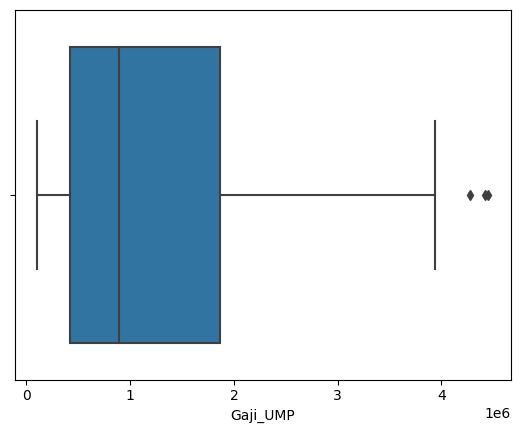

In [ ]:
sns.boxplot(x=df['Gaji_UMP'])
plt.show()

> Terlihat dari grafik tersebut bahwa range hanya dari 0-2 dan tidak terjadi perlebaran yang jauh sehingga dapat dimpulkan bahwa tidak ada anomali yang terjadi pada  pada dataset tersebut, karena jika terjadi anomali grafiknya akan jauh dari melebar dari garis tumpu

## Exploratory Data Analysis

### Univariate Analysis (Dimas Syafrizal S. - 221401093)

- Penjelasan tipe variabel tiap kolom (Kategorikal/Numerikal, Nominal/Ordinal/Interval/Rasio),
- Analisis komposisi tiap variabel
- Apakah variabel tersebut tersebar secara acak?
- Bagaimana distribusinya untuk data kontinu? Bagaimana bentuk dan tipenya?


Kolom "Provinsi":

Tipe Variabel: Kategorikal
karena berupa nama-nama provinsi di Indonesia.
Tidak ada urutan atau tingkatan yang inheren dalam kategori ini.
Variabel ini termasuk dalam tipe kategorikal nominal, di mana nilai-nilainya hanya menunjukkan kategori tanpa memiliki urutan spesifik.

Kolom "Gaji_UMP":

Tipe Variabel: Numerikal
Nilai-nilai dalam kolom ini mewakili gaji Upah Minimum Provinsi (UMP) di Indonesia.
Variabel ini termasuk dalam tipe numerikal rasio, di mana nilai-nilainya mewakili ukuran atau jumlah yang dapat diukur dan memiliki titik nol yang bermakna.

Kolom "Tahun":

Tipe Variabel: Numerikal
Nilai-nilai dalam kolom ini mewakili tahun data diperoleh.
Variabel ini termasuk dalam tipe numerikal interval, di mana nilai-nilainya mewakili perbedaan interval waktu antara tahun-tahun yang berbeda. Namun, tidak ada titik nol yang bermakna dalam tipe ini.

Kolom "Perubahan_Gaji":

Tipe Variabel: Numerikal
Nilai-nilai dalam kolom ini mewakili perubahan persentase gaji UMP dari tahun sebelumnya.
Variabel ini termasuk dalam tipe numerikal interval, di mana nilai-nilainya mewakili perbedaan interval antara perubahan persentase gaji. Namun, tidak ada titik nol yang bermakna dalam tipe ini.

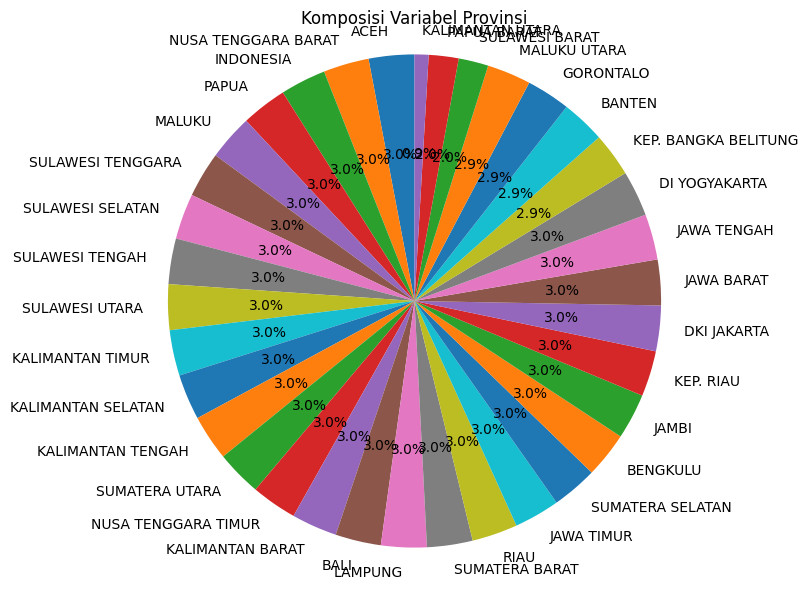

In [ ]:
data = df['Provinsi']

provinsi_counts = data.value_counts()
labels = provinsi_counts.index
sizes = provinsi_counts.values
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Komposisi Variabel Provinsi')
plt.show()

Informasi yang di dapat dari pie chart untuk variabel provinsi ini adalah hampir semua provinsi mengisi 3.0%, beberapa provinsi mengisi 2.9%, sulawesi barat dan papua 2.0% dan kalimantan utara 1.0% dari komposisi variabel provinsi.pie chart ini memberikan informasi provinsi mana saja yang lebih banyak tercatat dalam dataset.

Dikarenkan ada beberapa bagian yang tidak jelas, jadi untuk melihat persebran komposisi variabel provinsi yang lebih jelas dapat dilihat dibawah ini

In [ ]:
data = df['Provinsi']

provinsi_counts = data.value_counts()
provinsi_composition = provinsi_counts / len(data) * 100

print("Komposisi variabel Provinsi:")
print(provinsi_composition.apply(lambda x: '{:.2f}%'.format(x)))

Komposisi variabel Provinsi:
ACEH                    2.99%
NUSA TENGGARA BARAT     2.99%
INDONESIA               2.99%
PAPUA                   2.99%
MALUKU                  2.99%
SULAWESI TENGGARA       2.99%
SULAWESI SELATAN        2.99%
SULAWESI TENGAH         2.99%
SULAWESI UTARA          2.99%
KALIMANTAN TIMUR        2.99%
KALIMANTAN SELATAN      2.99%
KALIMANTAN TENGAH       2.99%
SUMATERA UTARA          2.99%
NUSA TENGGARA TIMUR     2.99%
KALIMANTAN BARAT        2.99%
BALI                    2.99%
LAMPUNG                 2.99%
SUMATERA BARAT          2.99%
RIAU                    2.99%
JAWA TIMUR              2.99%
SUMATERA SELATAN        2.99%
BENGKULU                2.99%
JAMBI                   2.99%
KEP. RIAU               2.99%
DKI JAKARTA             2.99%
JAWA BARAT              2.99%
JAWA TENGAH             2.99%
DI YOGYAKARTA           2.99%
KEP. BANGKA BELITUNG    2.87%
BANTEN                  2.87%
GORONTALO               2.87%
MALUKU UTARA            2.87%
SULAWESI BA

Pada program diatas ditulis 2.99%, karena pembulatan yang dilakukan oleh matplotlib makanya pada pie chart nya menjadi 3.0%. Begitu juga untuk 2.87%, 1.95% dan 0.92% karena pembulatan yang dilakukan oleh matplotlib makanya pada pie chart nya menjadi 2.9%, 2.0% dan 1.0%

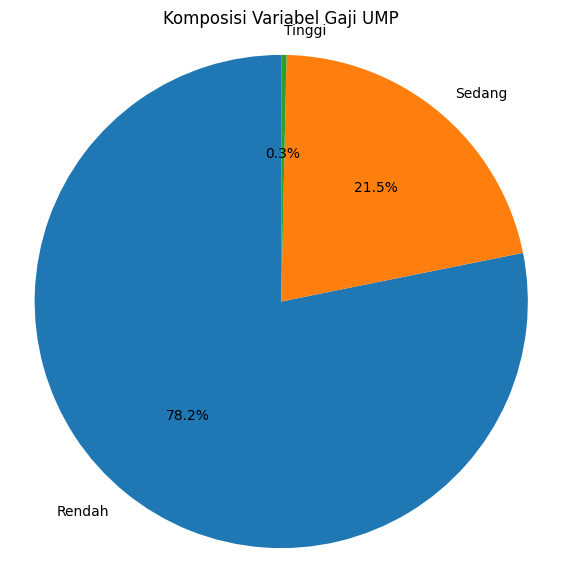

In [ ]:
data = df['Gaji_UMP']
gaji_categories = pd.cut(data, bins=[0, 2000000, 4000000, 6000000], labels=["Rendah", "Sedang", "Tinggi"])
gaji_counts = gaji_categories.value_counts()
gaji_composition = gaji_counts / len(data) * 100

# Membuat pie chart
plt.figure(figsize=(7, 7))
plt.pie(gaji_composition, labels=gaji_composition.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Komposisi Variabel Gaji UMP')

# Menampilkan pie chart
plt.show()


Sebelumnya untuk memudahkan melihat persebaran komposisi pada variabel Gaji_UMP, kita dapat membuat dalam beberapa kategori.

Variabel Gaji_UMP akan diklasifikasikan ke dalam tiga kategori yaitu: "Rendah", "Sedang", dan "Tinggi".

Gaji dengan nilai kurang dari atau sama dengan 2000000 akan masuk ke dalam kategori "Rendah".

Gaji dengan nilai lebih dari 2000000 dan kurang dari atau sama dengan 4000000 akan masuk ke dalam kategori "Sedang".

Gaji dengan nilai lebih dari 4000000 dan kurang dari atau sama dengan 6000000 akan masuk ke dalam kategori "Tinggi".

Sehingga dapat disimpulkan bahwa gaji yang masuk kedalam kategori rendah sebesar 78.2%, untuk kategori sedang sebesar 21.5% dan untuk kategori tinggi sebesar 0.3%

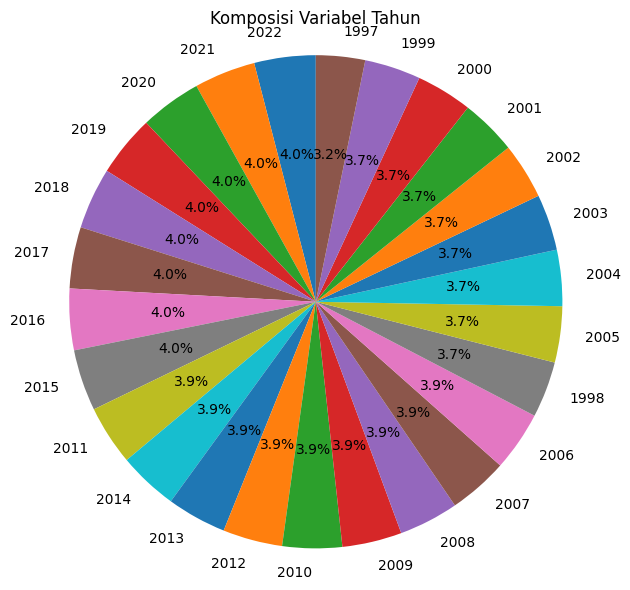

In [ ]:
tahun_composition = df['Tahun'].value_counts() / len(df['Tahun']) * 100
plt.figure(figsize=(7, 7))
plt.pie(tahun_composition, labels=tahun_composition.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Komposisi Variabel Tahun')
plt.show()

Informasi yang didapat dari pie chart ini adalah bahwa data tahun yang tercatat untuk tahun '1997' sebanyak 3.2% dari seluruh komposisi data, untuk tahun '1998 hinngga 2005' masing-masing sebanyak 3.9 %,untuk tahun '2006 hingga 2022' masing-masing sebanyak 4.0%. dapat disimpulkan bahwa data untuk tahun '1997' 0.5% lebih sedikit dari tahun '1998 hingga 2005', dan data untuk tahun '1998 hingga 2005' 0,1% lebih sedikit dari data tahun '2006 hingga 2020'.

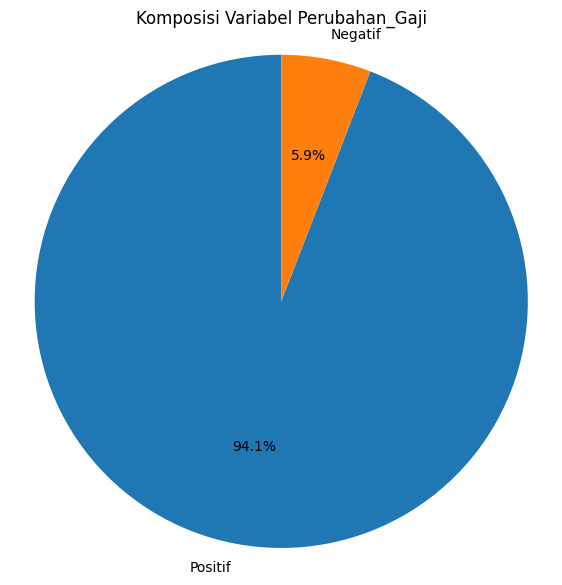

In [ ]:
perubahan_counts = pd.cut(df['Perubahan_Gaji'], bins=[-1, 0, 1], labels=["Negatif", "Positif"]).value_counts()
perubahan_composition = perubahan_counts / len(df['Perubahan_Gaji']) * 100

plt.figure(figsize=(7, 7))
plt.pie(perubahan_composition, labels=perubahan_composition.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Komposisi Variabel Perubahan_Gaji')
plt.show()


Untuk komposisi perubahan gaji dapat dibuat 2 kategori yaitu:
negatif dan positif, negatif untuk perubahan gaji yang mengalami penurunan dan positif untuk perubahan gaji yang mengalami kenaikan, sehingga dapat dilihat dalam pie chart ini bahwa komposisi kategori positif sebesar 94.1% dan komposisi kategori negatif sebesar 5.9%. jadi dapat disimpulkan bahwa perubahan gaji hampir seluruhnya mengalami kenaikan, dan hanya sebagian kecil yang mengalami penurunan

In [ ]:
data = df['Gaji_UMP']

ks_statistic, p_value = kstest(data, 'norm')
alpha = 0.05
if p_value > alpha:
    print("Data terdistribusi secara acak.")
else:
    print("Data tidak terdistribusi secara acak.")


Data tidak terdistribusi secara acak.


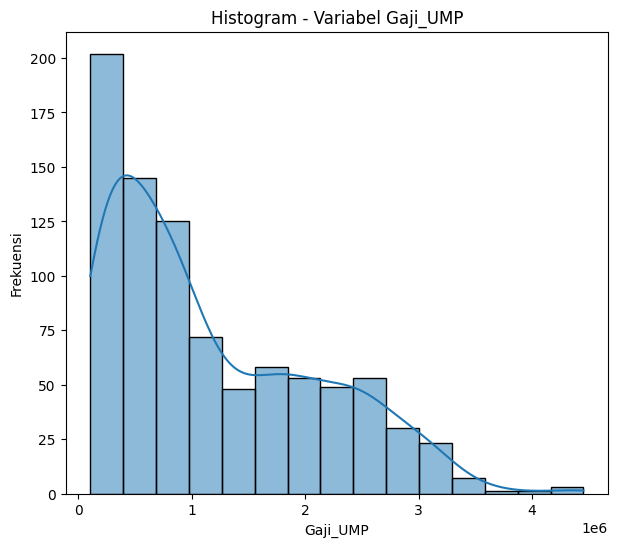

Distribusi variabel Gaji_UMP tidak mendekati distribusi normal.


In [ ]:
plt.figure(figsize=(7, 6))
sns.histplot(data=df, x='Gaji_UMP', kde=True)
plt.title('Histogram - Variabel Gaji_UMP')
plt.xlabel('Gaji_UMP')
plt.ylabel('Frekuensi')
plt.show()

data_gaji = df['Gaji_UMP']
statistic, p_value = kstest(data_gaji, 'norm')

alpha = 0.05
if p_value > alpha:
    print("Distribusi variabel Gaji_UMP mendekati distribusi normal.")
else:
    print("Distribusi variabel Gaji_UMP tidak mendekati distribusi normal.")



Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 12.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
f,2.934935e-12,3232.279770,-28963.787377,inf,0.097706,1.109522e-07
chi2,4.103326e-12,3253.999913,-28679.007872,inf,0.133087,6.727779e-14
norm,4.281236e-12,3264.537698,-28648.850225,inf,0.141268,1.304893e-15
t,4.627318e-12,3336.606743,-28574.451700,inf,0.528900,1.622861e-227


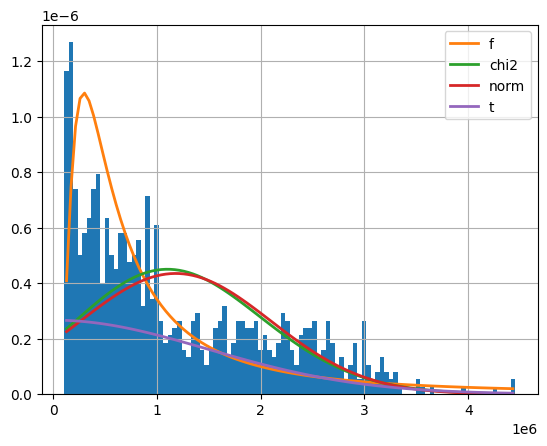

In [ ]:
f = Fitter(df['Gaji_UMP'],
          distributions = ['norm','chi2','f','t'])
f.fit()
f.summary()

In [ ]:
skewness = df['Gaji_UMP'].skew()
print("Skewness: ", skewness)

Skewness:  0.8172510908847476


Informasi yang dapat disimpulkan dari hasil diatas bahwa variabel Gaji_UMP memiliki bentuk skewness positif karena hasil skewness-nya bernilai positif yaitu sebesar 0.8172510908847476. Skewness positif menunjukkan bahwa distribusi cenderung condong ke kanan, yang berarti memiliki ekor panjang di sisi kanan. dan untuk tipe distribusinya tidak ada satupun yang cocok karena distribusi "t", "f", "chi2", dan "norm" memiliki nilai p-value yang sangat kecil.

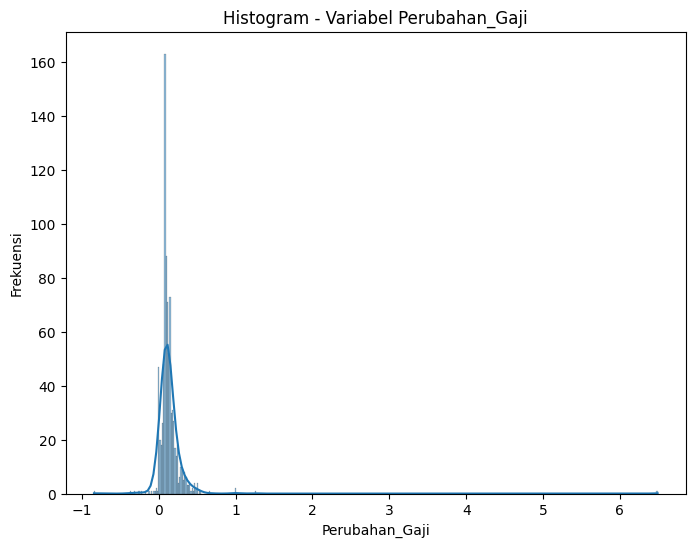

Distribusi variabel Perubahan_Gaji tidak mendekati distribusi normal.


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Perubahan_Gaji', kde=True)
plt.title('Histogram - Variabel Perubahan_Gaji')
plt.xlabel('Perubahan_Gaji')
plt.ylabel('Frekuensi')
plt.show()

data_perubahan = df['Perubahan_Gaji']
statistic, p_value = kstest(data_perubahan, 'norm')

alpha = 0.05
if p_value > alpha:
    print("Distribusi variabel Perubahan_Gaji mendekati distribusi normal.")
else:
    print("Distribusi variabel Perubahan_Gaji tidak mendekati distribusi normal.")

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 13.55it/s]


      sumsquare_error           aic          bic  kl_div  ks_statistic  \
t            0.932745   1463.516164 -5655.359161     inf      0.098728   
norm        26.114810  18533.890699 -2879.760982     inf      0.276983   
chi2        50.775078    730.696189 -2317.839482     inf      0.618868   
f           52.860991    624.301399 -2277.494944     inf      0.596447   

          ks_pvalue  
t      1.546927e-07  
norm   3.999667e-57  
chi2  1.111414e-308  
f     3.506198e-284  


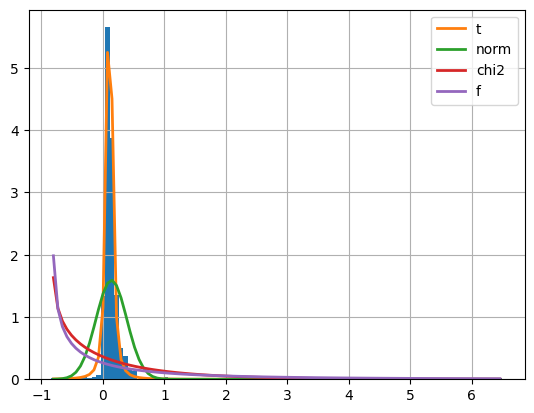

In [ ]:
data = df['Perubahan_Gaji']
data = data.dropna() # menghapus baris yang mengandung nilai NaN dari Data
distributions = ['norm', 'chi2', 'f', 't']
f = Fitter(data, distributions=distributions)
f.fit()
summary = f.summary()
print(summary)

In [ ]:
skewness = df['Perubahan_Gaji'].skew()
print("Skewness: ", skewness)

Skewness:  19.718643674637367


Informasi yang dapat disimpulkan dari hasil diatas bahwa variabel Perubahan_Gaji memiliki bentuk skewness positif karena hasil skewness-nya bernilai positif yaitu sebesar 19.718643674637367. Skewness positif menunjukkan bahwa distribusi cenderung condong ke kanan, yang berarti memiliki ekor panjang di sisi kanan. dan untuk tipe distribusinya merupakan distribusi t. Hal ini dapat dilihat dari nilai sumsquare_error yang paling rendah (0.932745) dan ks_pvalue yang cukup signifikan (mendekati nol). Oleh karena itu, distribusi t yang cocok paling untuk menggambarkan distribusi data Perubahan_Gaji

#### Penentuan Variabel


Penentuan variabel independen dan dependen

Variabel Provinsi:
Variabel ini merupakan variabel independen karena nilai-nilainya tidak bergantung pada variabel lain dalam dataset. Provinsi dianggap sebagai faktor kategoris yang mempengaruhi nilai-nilai dalam variabel dependen.

Variabel Tahun:
variabel ini merupakan independen karena nilai-nilainya tidak bergantung pada variabel lain dalam dataset. Tahun dianggap sebagai faktor waktu yang dapat mempengaruhi nilai-nilai dalam variabel dependen.

Variabel Gaji_UMP:
Variabel ini adalah variabel dependen karena nilai-nilainya bergantung pada Provinsi dan Tahun. Gaji_UMP adalah variabel yang ingin kita analisis dan nilai-nilainya dipengaruhi oleh lokasi (Provinsi) dan waktu (Tahun).

Variabel Perubahan_Gaji:
Variabel Perubahan_Gaji merupakan variabel dependen karena nilai-nilainya menggambarkan perubahan gaji dari tahun ke tahun. Nilai-nilai dalam variabel Perubahan_Gaji bergantung pada Tahun, Gaji_UMP dan provinsi.

### Bivariate Analysis (Jason Sendytio - 221401069, Kevin Maverick - 221401080)

* #### Homoskedastisitas (Jason Sendytio - 221401069)

Selanjutnya akan dicoba tes apakah data bersifat homoskedastis.

In [ ]:
stats.levene(df['Gaji_UMP'], df['Tahun'])

LeveneResult(statistic=1255.2367899409708, pvalue=2.027093248450068e-207)

Berdasarkan informasi yang terlihat, p-value lebih besar dari 0.05, yang berarti data tersebut homoskedastis.

* #### Korelasi Numerikal

Korelasi Numerikal untuk melihat korelasi antar tiap variabel dalam data.

In [ ]:
df_numerikal = df[['Gaji_UMP', 'Tahun', 'Perubahan_Gaji']]
df_numerikal.corr()

,Gaji_UMP,Tahun,Perubahan_Gaji
Gaji_UMP,1.000000,0.914862,-0.100076
Tahun,0.914862,1.000000,-0.154629
Perubahan_Gaji,-0.100076,-0.154629,1.000000


Dari tabel di atas, terlihat koefisien korelasi antar tiap variabel. Selanjutnya adalah visualisasi heatmap.

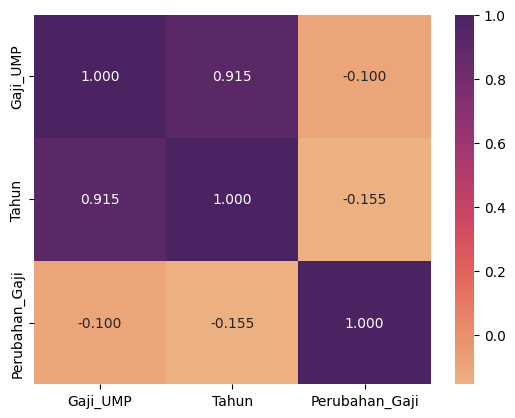

In [ ]:
sns.heatmap(
    data = df_numerikal.corr(method = 'pearson'),
    cmap = 'flare',
    annot = True,
    fmt = '.3f'
)

plt.show()

Untuk parameter method, digunakan metode 'pearson'. Dari visualisasi di atas, terlihat koefisien korelasi antar tiap variabel. Jika koefisien korelasi berada di antara 0.8 sampai 1.0, baik positif maupun negatif, maka menunjukkan bahwa ada korelasi yang kuat antar variabel tersebut.

* #### Hubungan Linearitas

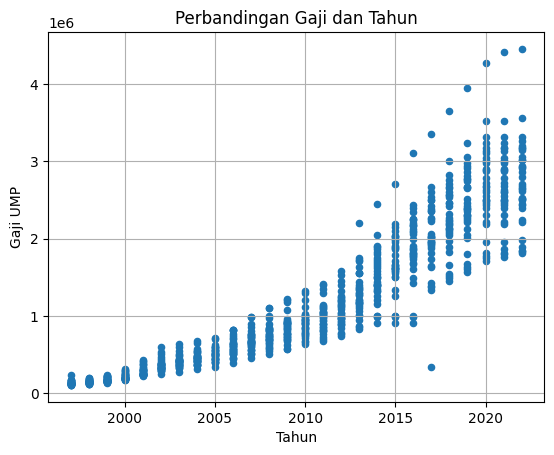

In [ ]:
df.plot(kind = 'scatter', x = 'Tahun', y = 'Gaji_UMP')
plt.title('Perbandingan Gaji dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Gaji UMP')
plt.grid(True)
plt.show()

Dari visualisasi di atas, terlihat bahwa ada hubungan linear antara Gaji UMP dengan Tahun. Selanjutnya untuk memastikan, digunakan korelasi, dan karena merupakan data kontinu, metode yang digunakan adalah pearson.

In [ ]:
scipy.stats.pearsonr(df['Tahun'],  df['Gaji_UMP'])

PearsonRResult(statistic=0.9148621053087073, pvalue=0.0)

Dari hasil di atas, didapatkan bahwa p-value bernilai 0, dan lebih kecil dari 0.05. Maka, dapat disimpulkan ada hubungan korelasi / linear antara Gaji UMP dan Tahun. Koefisien korelasi pearson yang didapatkan adalah 0.91, yang berarti ada korelasi yang kuat antara Gaji UMP dengan Tahun.

#### Hypothesis Testing (Kevin Maverick - 221401080)

pertama data akan dikelompokan ke provinsi masing-masing

In [ ]:
list_provinsi = list(df['Provinsi'].unique())

df_provinsi = df.groupby('Provinsi',group_keys=True)['Perubahan_Gaji'].apply(lambda x:x)
# df_provinsi

lalu data dari tiap provinsi akan dicek kenormalannya

In [ ]:
databasePro= list()
for pro in list_provinsi:
    # uji kenormalan data
    nilai = (df_provinsi[pro].dropna())
    if len(nilai)<8:
        print(f'ignoring {pro} due to insufficient data')
        continue
    # print(pro, stats.normaltest(df_provinsi[pro].dropna()))

    _,pval = stats.shapiro(nilai)
    # print(pro,pval)

    if pval<0.05:
        # nilai = list(df_provinsi[pro])
        databasePro.append((pro,list(nilai)))

# for p in databasePro:
#     print(p[0])
# terdapat 26 provinsi yang memiliki p-value dibawah 0.05

# maka dari itu diambilah nilai dari tiap 4 provinsi sebagai sampel

ignoring KALIMANTAN UTARA due to insufficient data


Dengan menggunakan data dari beberapa provinsi sebagai perbandingan, kita menguji median dengan Kruskal-Wallis.

In [ ]:
kalimantan_tengah = list(df_provinsi['KALIMANTAN TENGAH'].dropna())
jawatimur = list(df_provinsi['JAWA TIMUR'].dropna())
bengkulu = list(df_provinsi['BENGKULU'].dropna())
riau = list(df_provinsi['RIAU'].dropna())

result = stats.kruskal(kalimantan_tengah,riau,jawatimur,bengkulu)
print(result)


KruskalResult(statistic=1.0173514798012435, pvalue=0.7970535111948608)



karena p-value di tes Kruskal-Wallis adalah 0.79 > 0.05, maka dapat disimpulkan tidak ada perbedaan signifikan diantara keempat data tersebut.

## Pembuatan Model Regresi dan Evaluasi (Ananda Kelvin Power Situmorang - 221401065)

Kita akan membuat model regresi linier sederhana dengan Tahun sebagai variabel independen dan Gaji sebagai variabel dependen.

* ### Membagi Data

Pertama, kita perlu membagi data kita menjadi set pelatihan dan set pengujian. Set pelatihan akan digunakan untuk melatih model kita, sementara set pengujian akan digunakan untuk mengevaluasi kinerja model.

In [ ]:
X = df[['Tahun']].values
y = df['Gaji_UMP'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* ### Membuat Model

Kita dapat membuat model regresi linier kita dengan menggunakan *sklearn*. Setelah model dibuat, kita dapat melatihnya dengan menggunakan data pelatihan.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

* ### Evaluasi Model

Setelah model dilatih, kita bisa mengevaluasi kinerjanya menggunakan beberapa metrik. Saya akan menggunakan R-Squared karena paling mudah untuk diamati karena nilainya berkisar antara 0-1.

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('R2 Score:', r2)

R2 Score: 0.8389099082629923


> Nilai R-squared dari model ini adalah 0.836, yang berarti bahwa 83.6% variasi dalam variabel dependen (y) dapat dijelaskan oleh variabel independen (x1) dalam model ini. Itu adalah hasil yang cukup baik, menunjukkan bahwa model ini memiliki relevansi yang kuat.

* ### Membuat Prediksi

Setelah model dievaluasi, kita dapat menggunakan model tersebut untuk membuat prediksi tentang data baru, di sini saya ingin memprediksi rata rata UMP Indonesia untuk tahun 2023

In [ ]:
year_to_predict = np.array([[2023]])
predicted_salary = model.predict(year_to_predict)
print('Prediksi Gaji rata-rata UMP Indonesia 2023:', predicted_salary[0])

Prediksi Gaji rata-rata UMP Indonesia 2023: 2664640.955744177


> Di sini model kita memprediksi bahwa nanti di 2023 rata rata UMP Indonesia adalah Rp.2,664,640, di mana akan mengalami kenaikan dari tahun 2022 yang di mana UMP Indonesia adalah Rp.2,644,709

* ### F-Test

Terkahir kita akan melihat F-test di mana ini akan membantu kita memahami hubungan antara variabel tentang signifikansi dan kualitas model regresi kita. Kita akan menggunakan *sm.OLS* untuk melihat nilai F-statistic nya

In [ ]:
X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     3550.
Date:                Mon, 29 May 2023   Prob (F-statistic):          4.36e-275
Time:                        23:41:09   Log-Likelihood:                -9912.2
No. Observations:                 696   AIC:                         1.983e+04
Df Residuals:                     694   BIC:                         1.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.251e+08    3.8e+06    -59.268      0.0

> Dari hasil diatas kita dapat menyimpulkan nilai F-statistic sangat tinggi (3550) dan probabilitas terkait (Prob (F-statistic)) sangat rendah (4.36e-275), yang berarti model secara keseluruhan signifikan, dan ada hubungan yang kuat dan signifikan antara variabel independen dan dependen.